In [2]:
!pip install fredapi pandas numpy matplotlib plotly python-dotenv --quiet

In [13]:
import os
from dotenv import load_dotenv

load_dotenv()

False

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = "<FRED_KEY>"
if not os.environ.get("FRED_KEY"):
    from google.colab import userdata
    fred_key = userdata.get("FRED_KEY")
else:
    fred_key = os.environ["FRED_KEY"]

In [12]:
# 1. Create the Fed Object
fred = Fred(api_key=fred_key)

In [16]:
# 2. Search for economic data
sp_search = fred.search("S&P", order_by="popularity")

In [18]:
sp_search.shape

(1000, 15)

In [19]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-03-17,2025-03-17,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-03-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-14 08:55:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-03-17,2025-03-17,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-02-25 08:11:20-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-03-17,2025-03-17,S&P 500,2015-03-16,2025-03-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-03-14 19:11:37-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-03-17,2025-03-17,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-03-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-14 08:55:11-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-03-17,2025-03-17,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-03-13,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-14 09:02:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


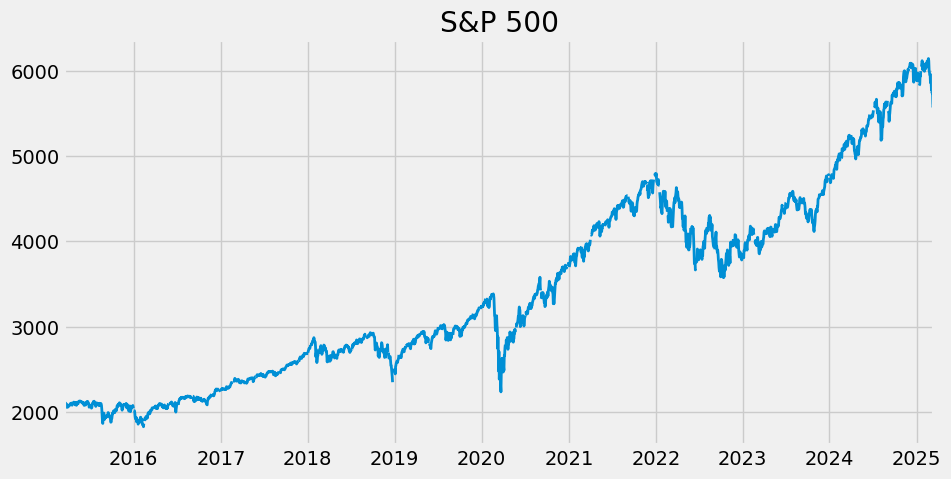

In [20]:
# 3. Pull Raw Data & Plot

sp_500 = fred.get_series(series_id='SP500')
sp_500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [22]:
# 4. Pull and Join Multiple Data Series

unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [23]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-03-17,2025-03-17,Unemployment Rate,1948-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:46:04-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-03-17,2025-03-17,Unemployment Rate - Black or African American,1972-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:48:10-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2025-03-17,2025-03-17,Unemployment Rate in California,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-05 15:30:14-06:00,64,None
TXUR,TXUR,2025-03-17,2025-03-17,Unemployment Rate in Texas,1976-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-05 15:31:43-06:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-03-17,2025-03-17,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...


In [24]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [25]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [26]:
uemp_results.shape

(1139, 46)

In [31]:
uemp_results.tail()

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,LNS14000001,LNS14027660,MIUR,LNS14027662,ALUR,LNS14024887,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,LRUN64TTUSM156S,SCUR,NMUR,MNUR,TNUR,LNS14032183,LNS14000012,WAUR,LNS14027659,MDUR,ORUR,WVUR,NVUR,ARUR
2024-10-01,4.1,5.7,5.5,4.2,NaN,3.8,5.7,NaN,4.4,2.0,3.5,4.0,5.1,3.8,3.7,4.5,4.2,4.0,5.2,2.5,3.3,9.5,4.2,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.201423,4.5,4.4,3.0,3.7,3.9,13.7,4.4,6.6,3.2,4.3,4.1,5.8,3.6
2024-11-01,4.2,6.4,5.5,4.2,NaN,3.9,6.0,NaN,4.4,2.0,3.5,4.2,5.3,3.8,3.7,4.5,4.3,4.6,5.2,2.5,3.3,9.4,4.1,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.331533,4.4,4.4,3.0,3.7,3.8,13.1,4.4,6.0,3.1,4.3,4.1,5.8,3.6
2024-12-01,4.1,6.1,5.5,4.2,NaN,3.7,5.6,NaN,4.4,1.9,3.4,4.1,5.1,3.6,3.7,4.5,4.1,4.3,5.2,2.4,3.3,9.0,4.1,3.7,4.9,4.6,3.6,4.6,3.8,3.1,2.9,5.3,4.156555,4.4,4.3,3.0,3.7,3.5,12.4,4.4,5.6,3.1,4.3,4.1,5.8,3.6
2025-01-01,4.0,6.2,NaN,NaN,NaN,3.7,6.9,NaN,NaN,1.9,NaN,4.0,4.8,3.5,NaN,NaN,4.0,4.5,NaN,2.3,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.122781,NaN,NaN,NaN,NaN,3.7,11.8,NaN,5.2,NaN,NaN,NaN,NaN,NaN
2025-02-01,4.1,6.0,NaN,NaN,NaN,3.8,5.5,NaN,NaN,1.9,NaN,4.1,5.2,3.8,NaN,NaN,4.2,4.2,NaN,2.5,NaN,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,12.9,NaN,6.0,NaN,NaN,NaN,NaN,NaN


In [32]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [34]:
uemp_results.tail()

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR
2024-10-01,5.5,4.2,4.4,3.5,3.7,4.5,5.2,3.3,4.2,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.5,4.4,3.0,3.7,4.4,3.2,4.3,4.1,5.8,3.6
2024-11-01,5.5,4.2,4.4,3.5,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.4,4.4,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6
2024-12-01,5.5,4.2,4.4,3.4,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.8,3.1,2.9,5.3,4.4,4.3,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6
2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [36]:
# Plot States Unemployment Rate
px.line(uemp_states)

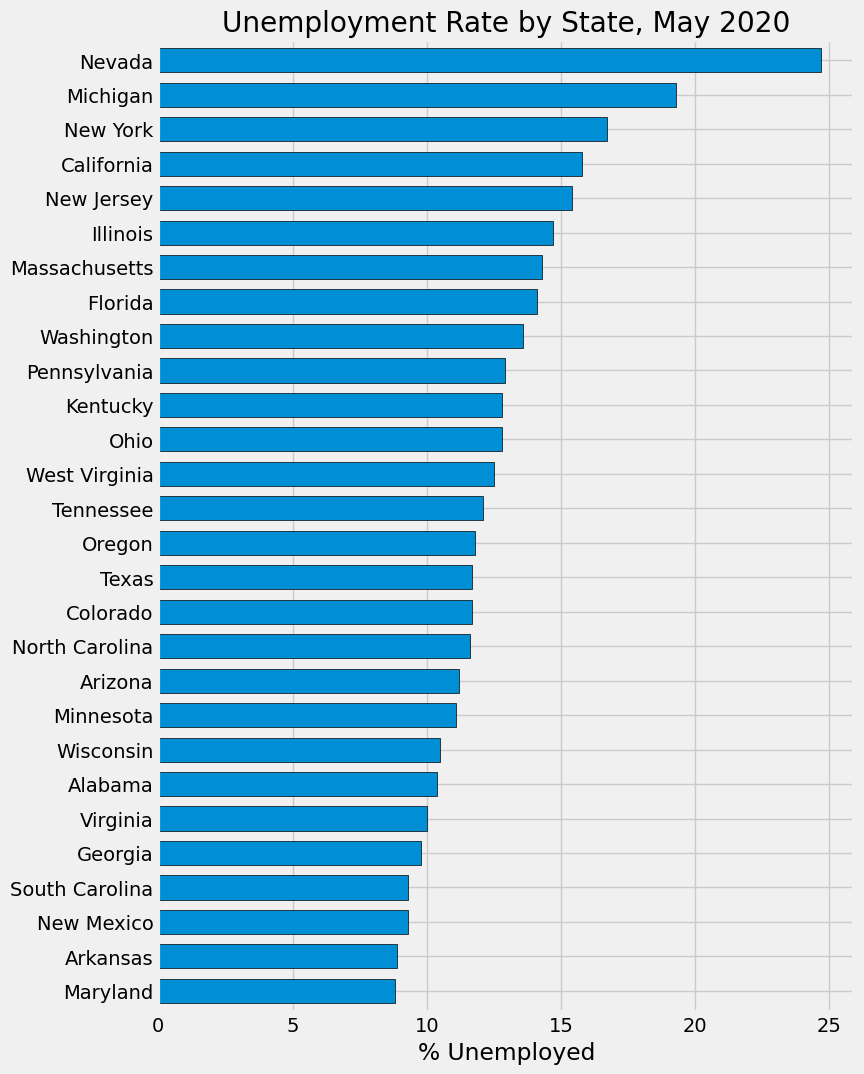

In [37]:
# Pull April 2020 Unemployment Rate Per State

ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [38]:
# Pull Participation Rate

part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [39]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [40]:
# Plot Unemployment vs Participation for each state

# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

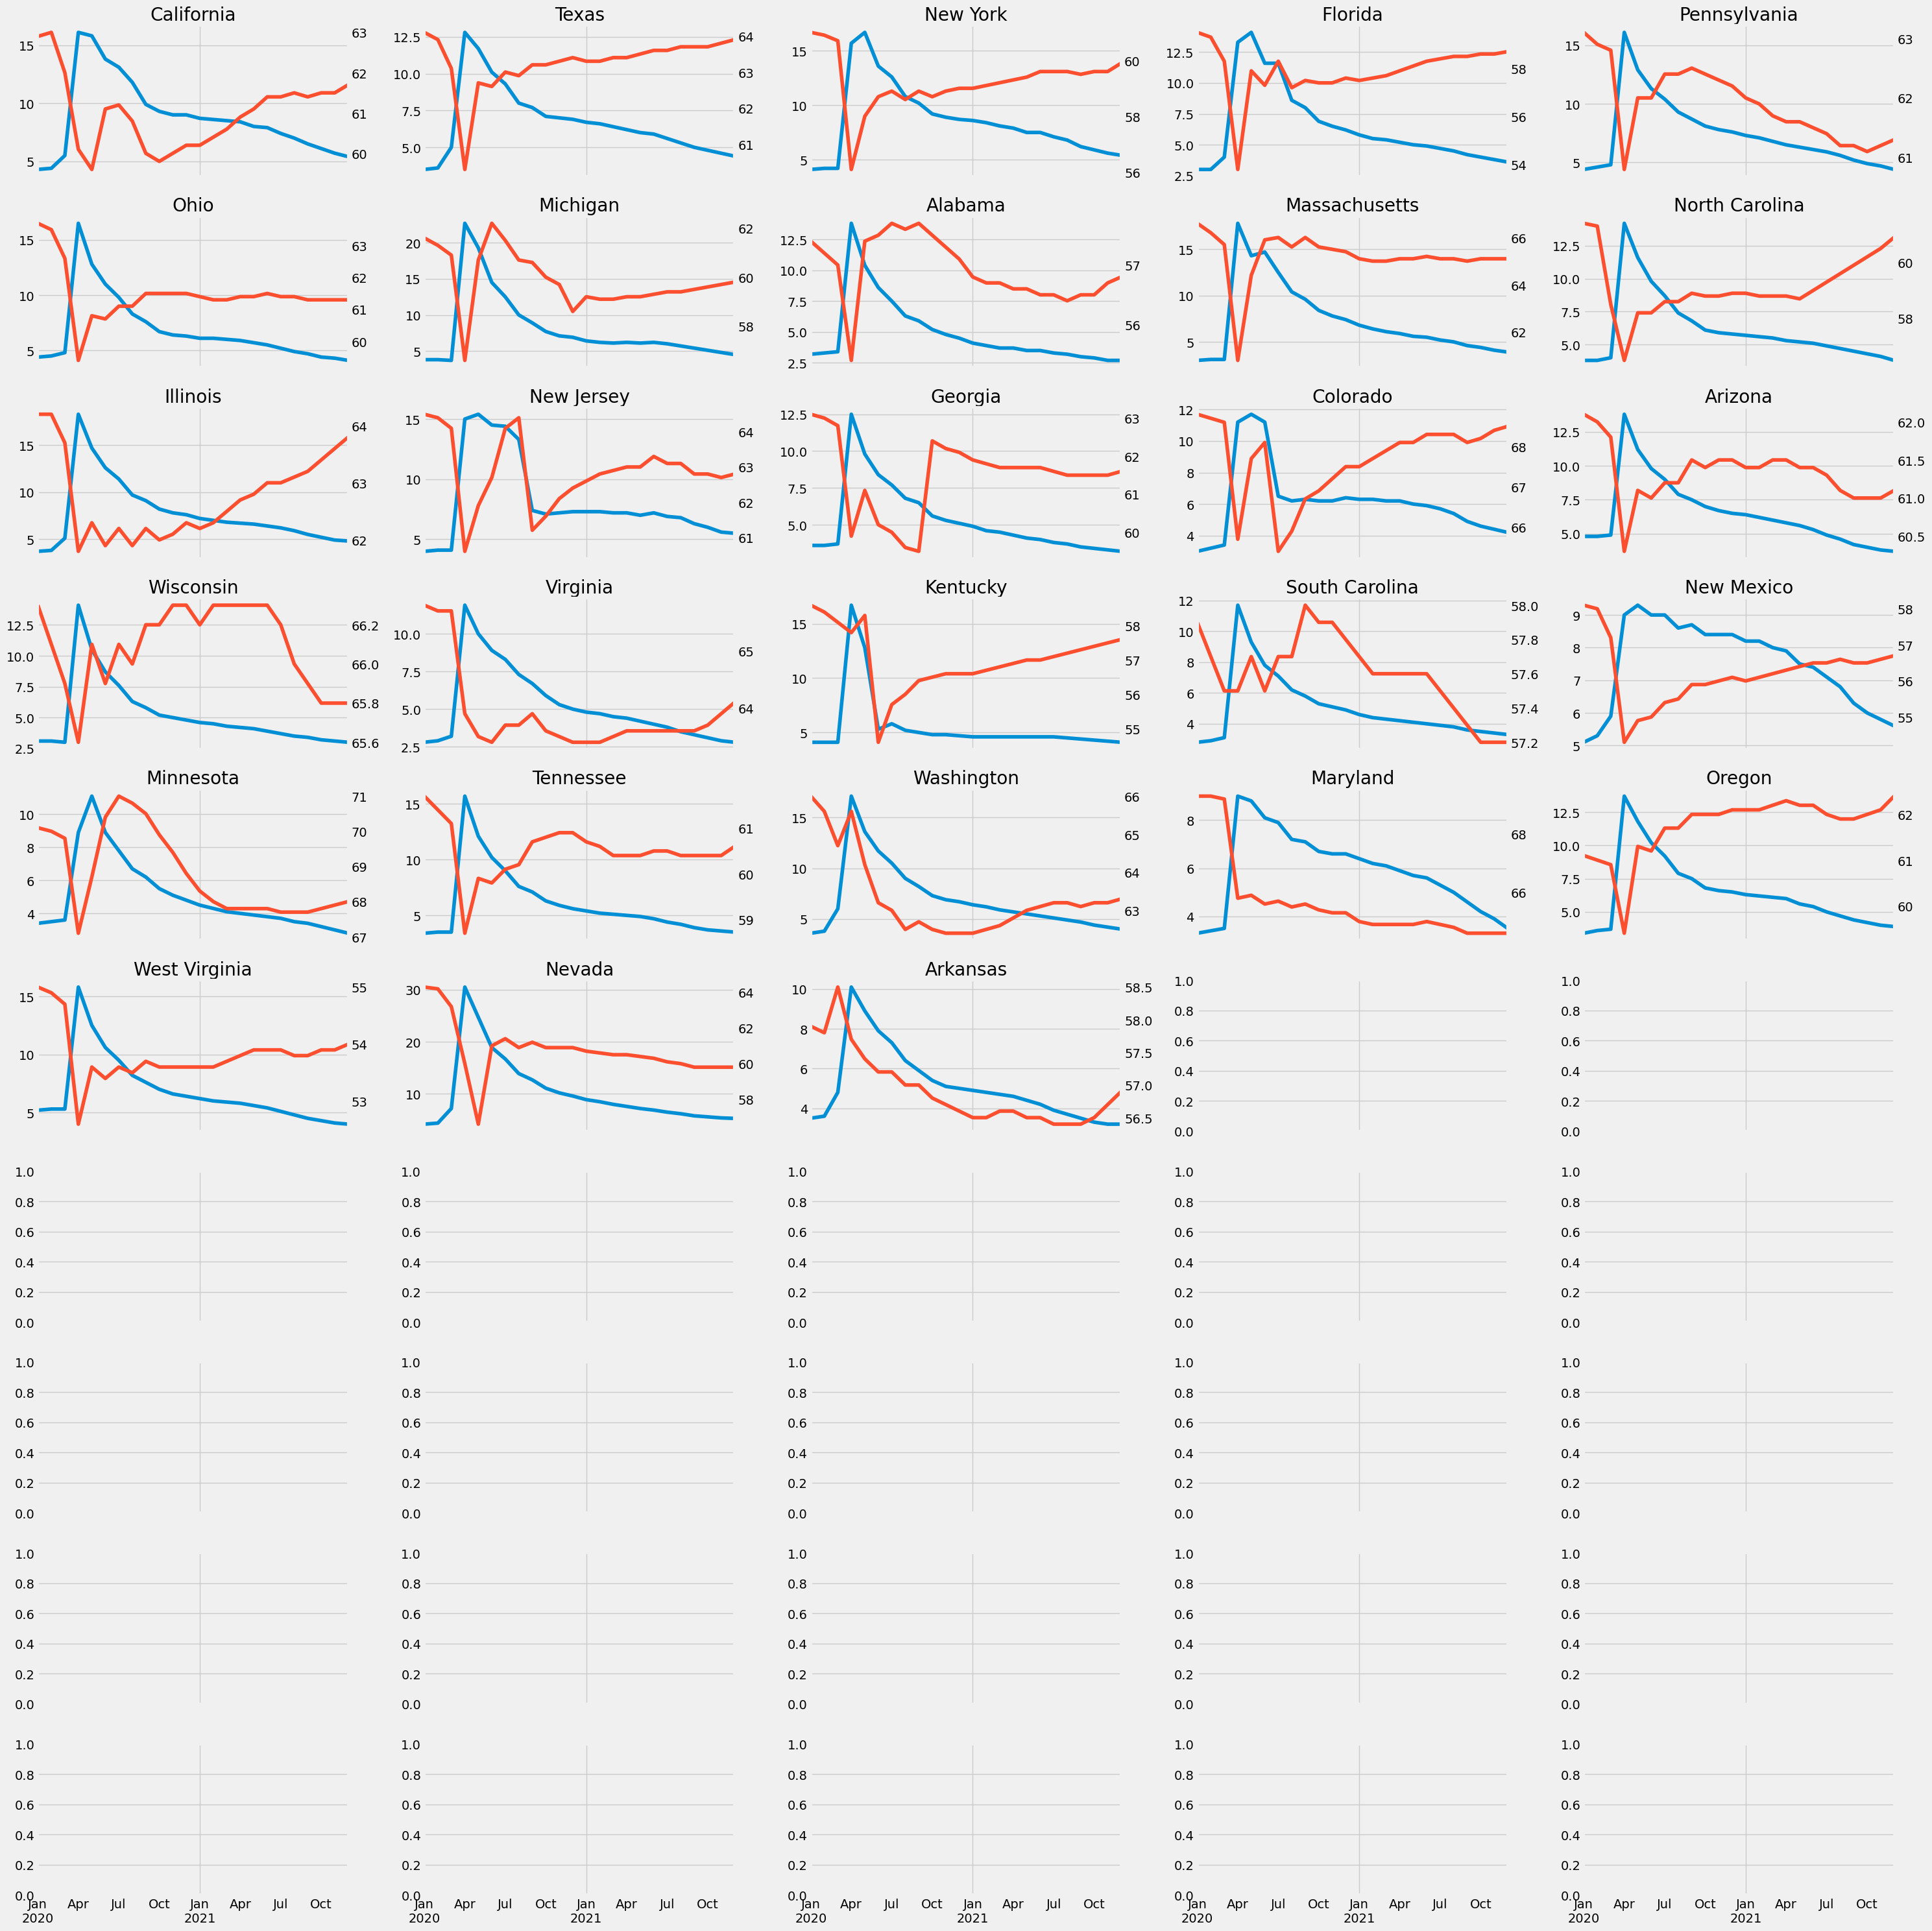

In [41]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

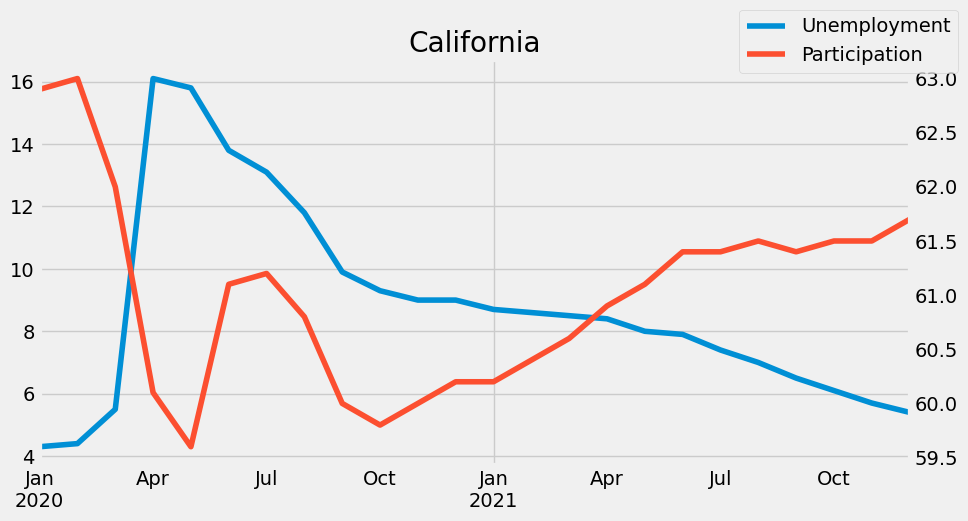

In [42]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()